## Applied Statistics ##

### Tasks ###

#### Task 1: Permutations and Combinations ####

This task involves a slight modificaiton of Ronald A. Fisher's "Lady Tasting Tea" experiment from 1935. This experiment involves making eight cups of tea, four of which have the tea put in first followed by the milk and the other four with the milk put in first followed by the tea; the lady referred to in the name of the experiment then tastes each cup of tea and tries to determine which cups had the milk put in first. Instead of using eight cups, we will analyse the experiement including twelve cups of tea.

The task as outlined by the lecturer is as follows:

*Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.*

*1. Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.*

*2. Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.*

*3. Would you accept two errors? Explain.*

To complete this task, I will will first install the same libraries that the lecturer installed before he analysed the original version of the experiment:

In [13]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

To answer the first question, we need to find the probability of correctly guessing 6 cups of tea out of 12 cups. The order that we select the 6 cups does not matter, so we are looking for the correct combination of 6 cups from the 12 cups. 

*If* we cared about the order the cups were selected, we would be seeking a *permutation* of the 12 listed a specific order, including the 6 cups with the milk put in first. 

Instead, to calculate the *combination* of 6 cups from 12, we can use the *math.comb()* method:

In [14]:
# Firstly we calculate the number of ways of selecting any 6 cups from the 12 cups
all_combinations = math.comb(12,6)

# The probability of selecting the one correct combination of 6 cups correctly from the 12 cups
prob_6_correct = 1 / all_combinations

# Printing the probability result out to four decimal places
print(f"The probability of correctly selecting all 6 'milk-first' cups is {round(prob_6_correct, 4)}.")

The probability of correctly selecting all 6 'milk-first' cups is 0.0011.


For the next question, we need to calculate the probability that the person makes *at most* one error. This means that they either select 5 of the 6 cups correctly, or else they select all 6 correctly. To find the probability of this happening if the person has no special power to guess, we find the probability of selecting 5 cups correctly and add it to the probability of selecting all 6 correctly, which was calculated in the answer to the first question above.

The probability of correctly selecting 5 out of the 6 'milk-first' cups requires us to work out how many combinations of 5 'milk-first' cups can be selected from the 6 'milk-first' cups and then multiplying this number of scenarios by the number of ways it is then possible to select 1 of the remaining 'tea-first' cups; this answer to the latter part is simply 6, as there are only 6 'tea-first' cups to choose from.

In [15]:
# Finding the number of combinations of 5 milk-first cups out of the 6 available, and multiplying it by the number of ways to 
# select 1 tea-first cup from the remaining 6 such cups
ways_5_correct = math.comb(6,5) * math.comb (6,1)

# dividing the above figure by the number of ways of selecting any 6 cups from the 12 cups
prob_5_correct = ways_5_correct / all_combinations

# finding the probability of selecting at most 1 wrong ie. at least 5 out of 6 correct
prob_5_or_6_correct = prob_5_correct + prob_6_correct

# Printing the probability result out to four decimal places
print(f"The probability of correctly selecting at least 5 of the 'milk-first' cups is {round(prob_5_or_6_correct, 4)}.")


The probability of correctly selecting at least 5 of the 'milk-first' cups is 0.04.


The third part of this task asks us to consider whether we would accept two errors. Another way of phrasing this might be, would we consider selecting 4 out of the 6 'milk-first' cups to be indicative of a special ability to determine whether a cup of tea had the milk or tea poured into it first, or would we consider the probability too high that somebody who doesn't have such a special ability could correctly select 4 'milk-first' cups by chance?

To calculate the probability of selecting 4 or more of the 'milk-first' cups correctly, we can do a similar calculation to the one we did to calculate the probability of selecting 5 or more correctly:

In [16]:
# The number of ways to select 4 out of the 6 'milk-first' cups multiplied by the number of ways to select 2 out of the 6 'tea-first' cups.
ways_4_correct = math.comb(6,4) * math.comb (6,2)

# dividing the above figure by the number of ways of selecting any 6 cups from the 12 cups
prob_4_correct = ways_4_correct / all_combinations

# finding the probability of selecting at most 2 wrong ie. at least 4 out of 6 correct, using the result from the last question
prob_4_or_5_or_6_correct = prob_4_correct + prob_5_or_6_correct

# Printing the result out to four decimal places
print(f"The probability of correctly selecting at least 4 of the 'milk-first' cups is {round(prob_4_or_5_or_6_correct, 4)}.")

The probability of correctly selecting at least 4 of the 'milk-first' cups is 0.2835.


To visualise how relatively likely selecting 4 'milk-first' cups correctly is compared with other possible outcomes, I will create a bar chart of the probability of each of the 7 possible outcomes (ie. selecting from 0 to 6 'milk-first' cups). To do this, I will first need to calculate each probability using the same combinations calculation I used for the probability of selecting 4, 5 and 6 'milk-first' cups correctly:

In [17]:
ways_0_correct = math.comb(6,0) * math.comb(6,6)
prob_0_correct = ways_0_correct / all_combinations

ways_1_correct = math.comb(6,1) * math.comb(6,5)
prob_1_correct = ways_1_correct / all_combinations

ways_2_correct = math.comb(6,2) * math.comb(6,4)
prob_2_correct = ways_2_correct / all_combinations

ways_3_correct = math.comb(6,3) * math.comb(6,3)
prob_3_correct = ways_3_correct / all_combinations


I will now plot all seven probability figures on a bar chart:

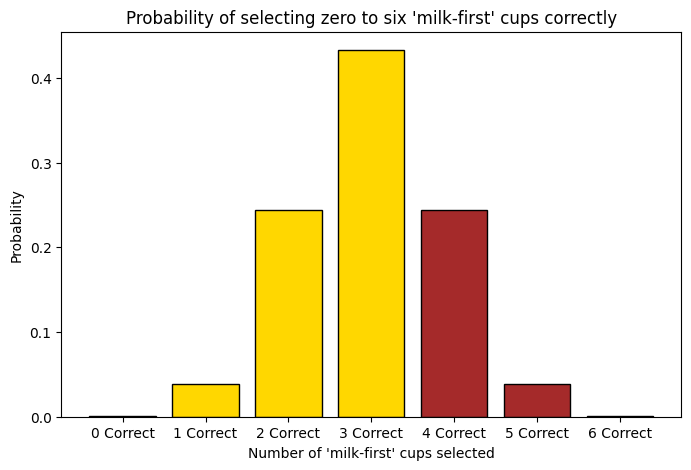

In [18]:
# Create a list of outcomes to include in the bar chart across the x-axis, and the probabilities of each outcome across the y-axis
outcomes = ["0 Correct", "1 Correct", "2 Correct", "3 Correct", "4 Correct", "5 Correct", "6 Correct"]
probabilities = [prob_0_correct, prob_1_correct, prob_2_correct, prob_3_correct, prob_4_correct, prob_5_correct, prob_6_correct]

# To colour the bars for 4 or more cups differently to the bars for 3 or fewer cups, we can use an if-else statement
colours = ["gold" if outcome in ["0 Correct", "1 Correct", "2 Correct", "3 Correct"] else "brown" for outcome in outcomes]

# plotting the bar chart 
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
plt.figure(figsize=(8, 5))

# Passing in the numerical data for each outcome, colouring the bars, and giving the bars darkened sides to improve appearance
# https://python-graph-gallery.com/3-control-color-of-barplots/
plt.bar(outcomes, probabilities, color=colours, edgecolor='black')
plt.xlabel("Number of 'milk-first' cups selected")
plt.ylabel("Probability")
plt.title("Probability of selecting zero to six 'milk-first' cups correctly")
plt.show()

From looking at this bar chart, I am even more convinced that allowing a person the chance to make two errors is too generous an allowance to give, as such an outcome if not unlikely by any means.

#### Task 2: numpy's Normal Distribution ####

The lecturer's instruction for this task is as follows:

*1. In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.*

*Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.*

*2. Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.*

Before beginning this task, I will import additional libraries used by the lecturer when demonstrating the nomral distribution with his code:

In [19]:
# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

To generate a sample of 100,000 vaues using the *nump.random.normal()* function, with mean 10.0 and deviation 3.0, we pass in the arguements as below:

In [20]:
# reference: https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html
data = np.random.normal(loc=10.0, scale=3.0, size=100000)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a Normal distribution. If the result obtained is extreme enough, we take it as evidence that the null hypothesis is false and that the data is *not* normally distributed. The inverse is not true ie. a non-extreme result cannot be taken as evidence that the data *is* normally distributed. The value of this statistic tends to be high (close to 1) for samples drawn from a normal distribution.

In [21]:
# Perform the Shapiro Wilk test.
stats.shapiro(data)

C:\Users\james\AppData\Local\Temp\ipykernel_2944\497950592.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stats.shapiro(data)


ShapiroResult(statistic=0.9999561848278289, pvalue=0.20695994124344236)

I will now plot a histogram values and plot the corresponding normal distribution probability density function on top of it:

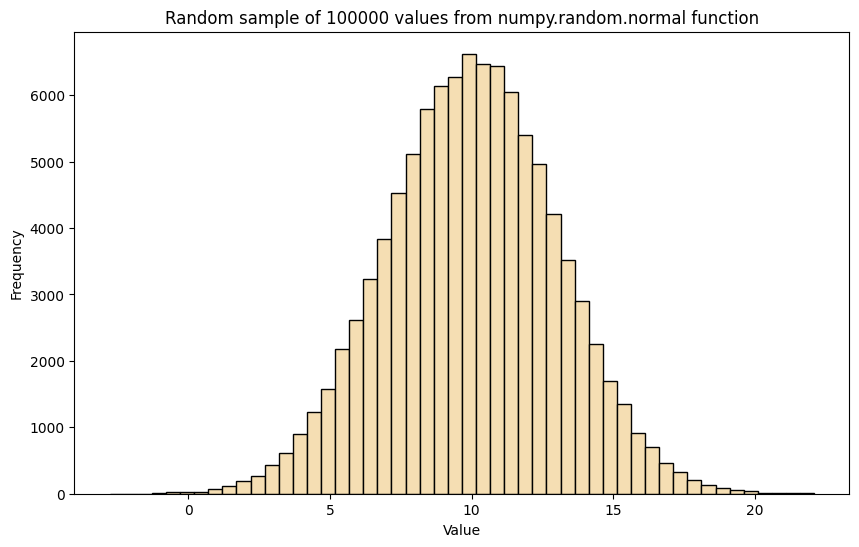

In [22]:
# Plotting the histogram firstly.
plt.figure(figsize=(10, 6))

# Passing in the random sample data, colouring the bars, and making the bars slightly transparent with darkened sides to improve appearance
plt.hist(data, bins=50, color='wheat', edgecolor='black')
plt.title("Random sample of 100000 values from numpy.random.normal function")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#### Task 3: t-Test Calculation ####

In Task 3, the lecturer has asked us to *consider a dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.*

We are asked to *calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.*

The below table of data was provided, which I will convert into a pandas dataframe to complete the task:

![resting heart rate data](task-3-data.jpg)



In [23]:
# import pandas to allow us to create a dataframe
import pandas as pd

# storing the data in arrays
patient_ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
heart_rate_before = [63, 68, 70, 64, 74, 67, 70, 57, 66, 65]
heart_rate_after = [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]

# creating the dataframe
data = {
    "Patient ID": patient_ids,
    "Before": heart_rate_before,
    "After": heart_rate_after
}

df = pd.DataFrame(data)

print(df)

   Patient ID  Before  After
0           0      63     64
1           1      68     64
2           2      70     68
3           3      64     64
4           4      74     73
5           5      67     70
6           6      70     72
7           7      57     54
8           8      66     61
9           9      65     63


Since this dataset consists of before and after data for each patient, the before and after data points can be considered paired-data for each patient. Therefore, the t-test we will perform is the paired t-test.

Firstly we will use the pre-built function ttest_rel from scipy stats to calculate this statistic:

In [30]:
from scipy.stats import ttest_rel

# passing in the data in the Before and After columns of the pandas dataframe created above
t_stat, p_value = ttest_rel(df["Before"], df["After"])

print(f"The T-statistic is {t_stat}")
print(f"The p_value is {p_value}")

The T-statistic is 1.337227482480628
The p_value is 0.21396011317404623


Next we will calculate this statistic ourselves:

#### Task 4: ANOVA ####

The lecturers instructions for this Task are as follows: 

*In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.*

*Now use a loop to perform the following test 10,000 times.*

*Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.*

*Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.*

*Summarize and explain your results.*

### References ###

##### Task 1 #####

##### Task 2 #####

##### Task 3 #####

##### Task 4 #####
